In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# TODO
# Implement the linear regression using gradient descent by only numpy

class LinearRegression:
    
    def __init__(self, task='single'):
        
        #print("Don't cheat.")
        self.epoch = []
        self.train_loss = []
        self.task = task
        if task == 'single':
            w0 = np.ones(1)
        elif task == 'multiple':
            w0 = np.ones(6)
            
        w1 = 0
        self.weights = [w0, w1]
        # y = w0 * x + w1

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        
        for epoch in range(epochs):
            idx_start = 0
            idx_end = batch_size
            total_loss = 0
            
            for batch in range(len(X)//batch_size):
                batch_x = X[idx_start:idx_end]
                y_target = y[idx_start:idx_end]
                idx_start += batch_size
                idx_end += batch_size
                if idx_end > len(X):
                    idx_end = len(X)
                
                #y_pred = self.weights[0] * batch_x + self.weights[1]
                y_pred = np.dot(batch_x, self.weights[0]) + self.weights[1]
                total_loss += self.get_loss(y_pred, y_target)
                # gradient of w0
                #g_w0 = ((y_pred - y_target) * batch_x).mean()
                g_w0 = np.dot(batch_x.T, (y_pred - y_target)) / batch_size
                # gradient of w1
                g_w1 = (y_pred - y_target).mean()
                
                self.weights[0] -= lr * g_w0
                self.weights[1] -= lr * g_w1
                '''
                if self.task == 'single':
                    print('epoch {}: weight {:.2f} intercept {:.2f}'.format(epoch, self.weights[0][0], self.weights[1]))
                elif self.task == 'multiple':
                    print('epoch {}: weight {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f} intercept {:.2f}'.format(
                    epoch, self.weights[0][0], self.weights[0][1], self.weights[0][2], self.weights[0][3], self.weights[0][4], self.weights[0][5], self.weights[1]))
                '''
            self.epoch.append(epoch)
            self.train_loss.append(total_loss)
            
            

    def get_loss(self, X, y):
        return np.mean((X - y) ** 2)

    def predict(self, X):
        return np.dot(X, self.weights[0]) + self.weights[1]
                
    def evaluate(self, X, y):
        y_pred = np.dot(X, self.weights[0]) + self.weights[1]
        return np.mean((y_pred - y) ** 2)
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss, 'b')
        plt.xlabel('epoch', fontsize=12)
        plt.ylabel('loss', fontsize=12)
        plt.show()


# Load data & data pre-processing

In [3]:
df_train = pd.DataFrame(pd.read_csv("./regression_train.csv"))
df_val   = pd.DataFrame(pd.read_csv("./regression_val.csv"))
df_test  = pd.DataFrame(pd.read_csv("./regression_test.csv"))

In [4]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
0,33,male,30.25,0,no,southeast,NaN
1,19,female,32.49,0,yes,northwest,NaN
2,50,male,37.07,1,no,southeast,NaN
3,41,female,32.60,3,no,southwest,NaN
4,52,female,24.86,0,no,southeast,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    object 
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    object 
 5   region    938 non-null    object 
 6   charges   938 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 51.4+ KB


In [7]:
# TODO
# You may do the labelEncoder here

#### For multiple features, please use the following settings.####

def label_encoding(df):
    # sex.female -> 0
    # sex.male -> 1
    li = []
    for data in df['sex']:
        if data == 'female':
            li.append(0)
        else:
            li.append(1)

    df['sex'] = pd.DataFrame(li)

    # smoker.no -> 0
    # smoker.yes -> 1
    li = []
    for data in df['smoker']:
        if data == 'no':
            li.append(0)
        else:
            li.append(1)

    df['smoker'] = pd.DataFrame(li)

    # region.northeast -> 0
    # region.northwest -> 1
    # region.southeast -> 2
    # region.southwest -> 3
    li = []
    for data in df['region']:
        if data == 'northeast':
            li.append(0)
        elif data == 'northwest':
            li.append(1)
        elif data == 'southeast':
            li.append(2)
        else:
            li.append(3)

    df['region'] = pd.DataFrame(li)

label_encoding(df_train)
label_encoding(df_val)
label_encoding(df_test)
##################################################################


# You may try different label encoding for training your own model

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       938 non-null    int64  
 1   sex       938 non-null    int64  
 2   bmi       938 non-null    float64
 3   children  938 non-null    int64  
 4   smoker    938 non-null    int64  
 5   region    938 non-null    int64  
 6   charges   938 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 51.4 KB


# Single feature (using bmi)

In [8]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']
x_train = x_train[['bmi']]

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']
x_val = x_val[['bmi']]

x_test = df_test.drop(['charges'], axis=1)
x_test = x_test[['bmi']]

In [9]:
# TODO
# You may convert data to NumPy here 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)

In [10]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 9
lr = 2*1e-3
epochs = 250000

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [11]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  1382.5371478013026
Weights:  [array([380.1346459])]


In [12]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  139562065.48342776


In [13]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  136920284.38379115


In [14]:
test_pred = linear_reg.predict(x_test)

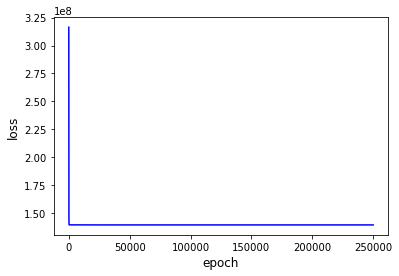

In [15]:
linear_reg.plot_curve()

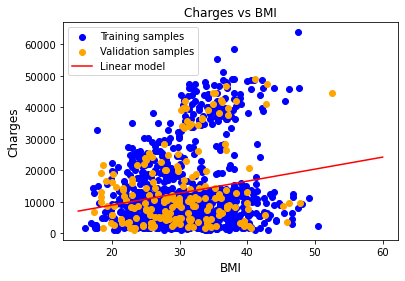

In [16]:
# Use matplotlib to plot the predicted line with the training and validation samples

# TODO
weight = linear_reg.weights[:-1][0][0]
intercept = linear_reg.weights[-1]

plt.scatter(x_train, y_train, c='b')
plt.scatter(x_val, y_val, c='orange')
x = np.linspace(15.0, 60.0)
y = x * weight + intercept
plt.plot(x, y, 'r')

plt.title('Charges vs BMI',fontsize=12)
plt.xlabel('BMI',fontsize=12)
plt.ylabel('Charges',fontsize=12)
plt.legend(['Training samples', 'Validation samples', 'Linear model'])
plt.show()

# Multiple features

In [17]:
# Do not modify here

x_train = df_train.drop(['charges'], axis=1)
y_train = df_train['charges']

x_val = df_val.drop(['charges'], axis=1)
y_val = df_val['charges']

x_test = df_test.drop(['charges'], axis=1)

In [18]:
# TODO
# You may convert data to NumPy here 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)

In [19]:
batch_size = x_train.shape[0]

# TODO
# Tune the parameters
# Refer to slide page 10
lr = 7*1e-4
epochs = 1000000

linear_reg = LinearRegression('multiple')
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [20]:
print("Intercepts: ", linear_reg.weights[-1])
print("Weights: ", linear_reg.weights[:-1])

Intercepts:  -11857.057350985515
Weights:  [array([  259.85086418,  -383.54524442,   333.33251488,   442.55747832,
       24032.22099508,  -416.01438631])]


In [21]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))

training loss:  34697170.25351918


In [22]:
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

validation loss:  41958565.75652556


In [23]:
test_pred = linear_reg.predict(x_test)

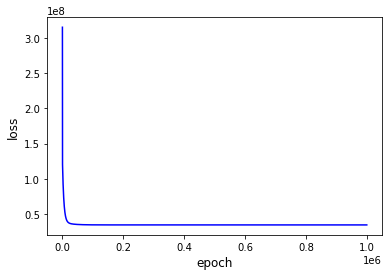

In [24]:
linear_reg.plot_curve()

# Train your own model and predict for testing data.

In [25]:
class MyLinearRegression:
    
    def __init__(self, n_feature):
        self.epoch = []
        self.train_loss = []
        self.n_feature = n_feature
        w0 = np.ones(n_feature)
        w1 = 0
        self.weights = [w0, w1]

    def fit(self, X, y, lr=0.001, epochs=100, batch_size=1):
        
        for epoch in range(epochs):
            idx_start = 0
            idx_end = batch_size
            total_loss = 0
            
            for batch in range(len(X)//batch_size):
                batch_x = X[idx_start:idx_end]
                y_target = y[idx_start:idx_end]
                idx_start += batch_size
                idx_end += batch_size
                if idx_end > len(X):
                    idx_end = len(X)
                
                #y_pred = self.weights[0] * batch_x + self.weights[1]
                y_pred = np.dot(batch_x, self.weights[0]) + self.weights[1]
                total_loss += self.get_loss(y_pred, y_target)
                # gradient of w0
                #g_w0 = ((y_pred - y_target) * batch_x).mean()
                g_w0 = np.dot(batch_x.T, (y_pred - y_target)) / batch_size
                # gradient of w1
                g_w1 = (y_pred - y_target).mean()
                
                self.weights[0] -= lr * g_w0
                self.weights[1] -= lr * g_w1
                '''
                print('epoch ' + str(epoch) + ':', end=' ')
                for i in range(self.n_feature):
                    print('weight {:.2f},'.format(self.weights[0][i]), end=' ')
                print('intercept {:.2f}'.format(self.weights[1]))
                '''
            self.epoch.append(epoch)
            self.train_loss.append(total_loss)
            
            

    def get_loss(self, X, y):
        return np.mean((X - y) ** 2)

    def predict(self, X):
        y_pred = np.dot(X, self.weights[0]) + self.weights[1]
        y_pred = np.expand_dims(y_pred, axis=1)
        return y_pred
                
    def evaluate(self, X, y):
        y_pred = np.dot(X, self.weights[0]) + self.weights[1]
        return np.mean((y_pred - y) ** 2)
        
    def plot_curve(self):
        # self.epoch and self.train_loss may be helpful here. 
        plt.plot(self.epoch, self.train_loss, 'b')
        plt.xlabel('epoch', fontsize=12)
        plt.ylabel('loss', fontsize=12)
        plt.show()

In [26]:
# features: age, sex, bmi, children, smoker, region
x_train = df_train.drop(['charges', 'sex', 'children'], axis=1)
y_train = df_train['charges']
x_val = df_val.drop(['charges', 'sex', 'children'], axis=1)
y_val = df_val['charges']
x_test = df_test.drop(['charges', 'sex', 'children'], axis=1)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)

def poly_feature(a):
    Len = a.shape[0]
    buffer = []
    li0 = [1] * Len
    li1 = a[:,0].tolist()
    li2 = a[:,1].tolist()
    li3 = a[:,2].tolist()
    li4 = a[:,3].tolist()
    li5 = (a[:,0] * a[:,1]).tolist()
    li6 = (a[:,0] * a[:,2]).tolist()
    li7 = (a[:,0] * a[:,3]).tolist()
    li8 = (a[:,1] * a[:,2]).tolist()
    li9 = (a[:,1] * a[:,3]).tolist()
    li10 = (a[:,2] * a[:,3]).tolist()
    li11 = (a[:,0] * a[:,1] * a[:,2]).tolist()
    li12 = (a[:,0] * a[:,1] * a[:,3]).tolist()
    li13 = (a[:,0] * a[:,2] * a[:,3]).tolist()
    li14 = (a[:,1] * a[:,2] * a[:,3]).tolist()
    li15 = (a[:,0] * a[:,1] * a[:,2] * a[:,3]).tolist()
    
    buffer.append(li0)
    buffer.append(li1)
    buffer.append(li2)
    buffer.append(li3)
    buffer.append(li4)
    buffer.append(li5)
    buffer.append(li6)
    buffer.append(li7)
    buffer.append(li8)
    buffer.append(li9)
    buffer.append(li10)
    buffer.append(li11)
    buffer.append(li12)
    buffer.append(li13)
    buffer.append(li14)
    buffer.append(li15)
    
    buffer = np.array(buffer, dtype=float)
    return buffer.T


x_train = poly_feature(x_train)
x_val = poly_feature(x_val)
x_test = poly_feature(x_test)

In [27]:
batch_size = x_train.shape[0]
linear_reg = MyLinearRegression(16)
lr = 1e-7
epochs = 1000000
linear_reg.fit(x_train, y_train, lr=lr, epochs=epochs, batch_size=batch_size)

In [28]:
print('training loss: ', linear_reg.evaluate(x_train, y_train))
print('validation loss: ', linear_reg.evaluate(x_val, y_val))

training loss:  23301836.36248132
validation loss:  28305788.92847915


In [29]:
test_pred = linear_reg.predict(x_test)
print("test_pred shape: ", test_pred.shape)
assert test_pred.shape == (200, 1)

test_pred shape:  (200, 1)


# Output the csv file

In [30]:
df_test = pd.DataFrame(pd.read_csv("./regression_test.csv"))
df_test["charges"] = test_pred
df_test.to_csv("sample_output.csv")